In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

from lib import *

In [2]:
proteome = fasta_iter('/home/amayer/data/proteomes/uniprot-homosapiens-up000005640.fasta')

In [3]:
lens = []
for seq in proteome:
    lens.append(len(seq[1]))

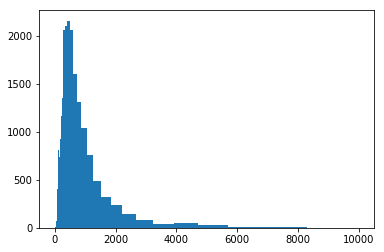

In [4]:
plt.hist(lens, bins=np.logspace(0, 4));

In [5]:
proteome = fasta_iter('/home/amayer/data/proteomes/uniprot-neisseriameningitdis-UP000000425.fasta')
len(np.unique(list(''.join([seq for h, seq in proteome]))))

20

In [20]:
k = 1
proteome = fasta_iter('/home/amayer/data/proteomes/uniprot-homosapiens-up000005640.fasta')
counter = defaultdict(int)
for header, sequence in proteome:
    count_kmers(sequence, k, counter=counter)
proteome = fasta_iter('/home/amayer/data/proteomes/uniprot-PlasmodiumFalciparum-up000001450.fasta')
counter2 = defaultdict(int)
for header, sequence in proteome:
    count_kmers(sequence, k, counter=counter2)

1.137079e+07, 6.400000e+07


Text(0.5,0,'k')

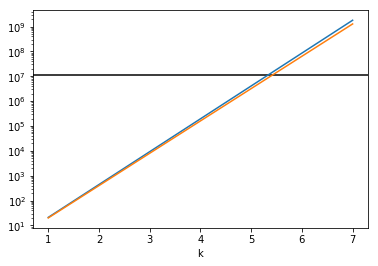

In [21]:
totalpeptides = np.sum(list(counter.values()))
print('%e, %e'%(totalpeptides, 20**6))
x = np.arange(1, 8)
plt.axhline(totalpeptides, color='k')
plt.plot(x, 21**x)
plt.plot(x, 20**x)
plt.yscale('log')
plt.xlabel('k')

In [22]:
2**scipy.stats.entropy(normalize(counter), base=2), 2**scipy.stats.entropy(normalize(counter2), base=2), 20**k

(18.09689067969323, 15.695846089968521, 20)

In [35]:
normalize(counter)

array([2.13200647e-02, 5.35581034e-02, 6.57225166e-02, 2.66593591e-02,
       6.31136391e-02, 4.73929210e-02, 7.10458050e-02, 5.72611000e-02,
       9.96074943e-02, 5.64265054e-02, 4.77053004e-02, 1.21853440e-02,
       8.32477705e-02, 5.96661217e-02, 3.64800479e-02, 3.58514197e-02,
       2.62400391e-02, 4.33489631e-02, 2.29733358e-02, 7.01908953e-02,
       3.25395129e-06])

Text(0,0.5,'frequency')

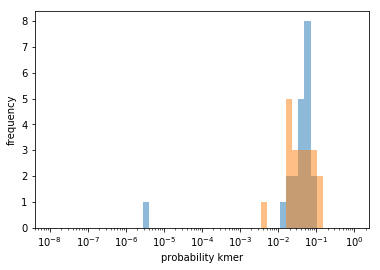

In [44]:
bins = np.logspace(-8, 0)
plt.hist(normalize(counter), bins=bins, alpha=.5)
plt.hist(normalize(counter2), bins=bins, alpha=.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('probability kmer')
plt.ylabel('frequency')

In [24]:
len(counter.values())/20**k, len(counter2.values())/20**k

(1.05, 1.0)

In [25]:
df = counter_to_df(counter)
df2 = counter_to_df(counter2)

In [28]:
dfmerged = pd.merge(df, df2, on='seq', suffixes=['_human', '_pathogen'])
dfmerged.to_csv('data.csv')

In [29]:
scipy.stats.entropy(dfmerged['freq_human'], dfmerged['freq_pathogen']), scipy.stats.entropy(dfmerged['freq_pathogen'], dfmerged['freq_human'])

(0.2346636095557455, 0.24755395990928056)

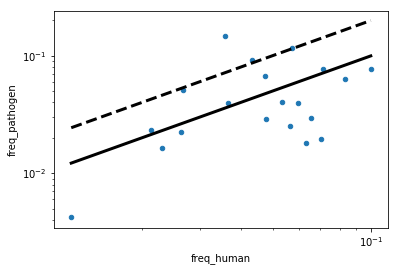

In [30]:
dfmerged.plot(x='freq_human', y='freq_pathogen', kind='scatter', logx=True, logy=True)
x = np.logspace(np.log10(np.amin(dfmerged['freq_human'])), np.log10(np.amax(dfmerged['freq_human'])))
plt.plot(x, x, 'k', lw=3)
plt.plot(x, x*2, '--k', lw=3)

/home/amayer/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/amayer/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


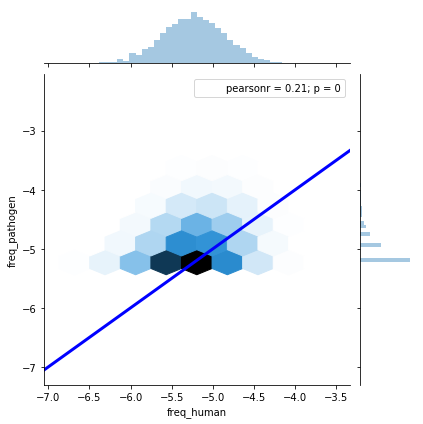

In [19]:
j = sns.jointplot(x=np.log10(dfmerged['freq_human']), y=np.log10(dfmerged['freq_pathogen']), kind="hex",
                 joint_kws=dict(gridsize=10));
x = np.logspace(np.log10(np.amin(dfmerged['freq_human'])), np.log10(np.amax(dfmerged['freq_human'])))
j.ax_joint.plot(np.log10(x), np.log10(x), 'b', lw=3)

In [16]:
dfmerged['fold'] = dfmerged['freq_pathogen']/dfmerged['freq_human']

In [17]:
dfmerged[dfmerged['freq_human']>2e-6].sort_values('fold', ascending=False)

,seq,freq_human,freq_pathogen,fold
21052,NNNN,0.000006,0.009053,1442.053478
60080,DNNN,0.000003,0.001210,402.565388
32888,NDNN,0.000002,0.000795,390.896826
23747,NNND,0.000003,0.001127,386.300119
8868,NNDN,0.000002,0.000878,354.640937
2785,NNMN,0.000003,0.000831,323.903185
10046,NNIN,0.000003,0.000866,264.750210
42125,NINN,0.000004,0.000860,226.247989
25689,NNNI,0.000005,0.000908,173.990125
31280,NDDN,0.000003,0.000486,157.192199


In [18]:
dfm = dfmerged.set_index('seq')
dfm.loc['TNNN']

freq_human        0.000004
freq_pathogen     0.000190
fold             48.795805
Name: TNNN, dtype: float64